In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
wildlife = pd.read_csv('../clean_data/synthetic_wildlife.csv', parse_dates=['CALL_SAVED_TIME'])

In [3]:
wildlife.shape

(152743, 5)

In [4]:
wildlife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152743 entries, 0 to 152742
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CALL_SAVED_TIME  152672 non-null  datetime64[ns]
 1   CALL_REGION      152743 non-null  object        
 2   CA_ANIMAL_TYPE   152743 non-null  object        
 3   reason_for_call  152743 non-null  object        
 4   type_of_calls    152743 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.8+ MB


In [5]:
wildlife.head()

,CALL_SAVED_TIME,CALL_REGION,CA_ANIMAL_TYPE,reason_for_call,type_of_calls
0,2020-01-01,Glasgow,*Other Wildlife,injury,report_calls
1,2020-01-01,Unknown,Wild Bird,unclear,report_calls
2,2020-01-01,Aberdeen,Wild Bird,injury,report_calls
3,2020-01-01,Aberdeen,Gull,injury,report_calls
4,2020-01-01,Inverness,Fox,injury,report_calls


In [6]:
wildlife_injuries = wildlife[wildlife['reason_for_call']=='injury'].copy()
wildlife_injuries.info()
#Client is mostly interested in injuries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83940 entries, 0 to 152742
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CALL_SAVED_TIME  83904 non-null  datetime64[ns]
 1   CALL_REGION      83940 non-null  object        
 2   CA_ANIMAL_TYPE   83940 non-null  object        
 3   reason_for_call  83940 non-null  object        
 4   type_of_calls    83940 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 3.8+ MB


## Trend by region

In [7]:
df_count = wildlife_injuries.groupby('CALL_REGION').count().sort_values(['reason_for_call'], ascending = False)[['reason_for_call']]

In [8]:
df_count['Region'] = df_count.index

In [9]:
df_count
#there are more injuries in Glasgow reported, due to more population?

,reason_for_call,Region
CALL_REGION,,
Glasgow,21216,Glasgow
Central,18808,Central
Aberdeen,16578,Aberdeen
Edinburgh,14812,Edinburgh
Unknown,6561,Unknown
Inverness,5965,Inverness


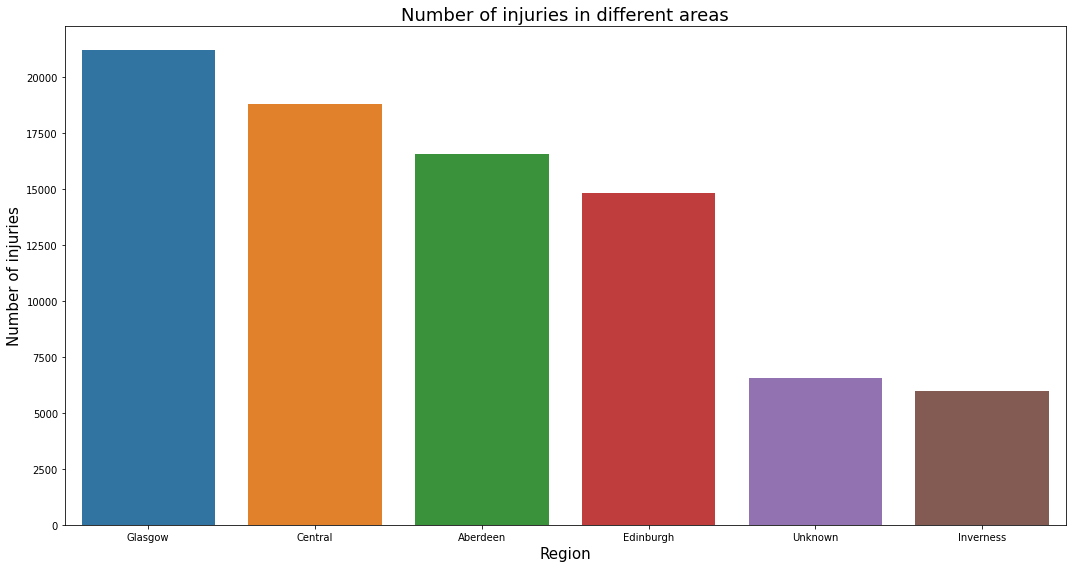

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Region',y = 'reason_for_call', data = df_count)
plt.xlabel("Region", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries in different areas", size=18)
plt.tight_layout()

## Trend by year

In [11]:
df_time = wildlife_injuries.groupby(['CALL_SAVED_TIME']).count()
df_time

,CALL_REGION,CA_ANIMAL_TYPE,reason_for_call,type_of_calls
CALL_SAVED_TIME,,,,
2018-01-01,34,34,34,34
2018-01-02,28,28,28,28
2018-01-03,48,48,48,48
2018-01-04,41,41,41,41
2018-01-05,40,40,40,40
...,...,...,...,...
2020-04-26,109,109,109,109
2020-04-27,112,112,112,112
2020-04-28,99,99,99,99


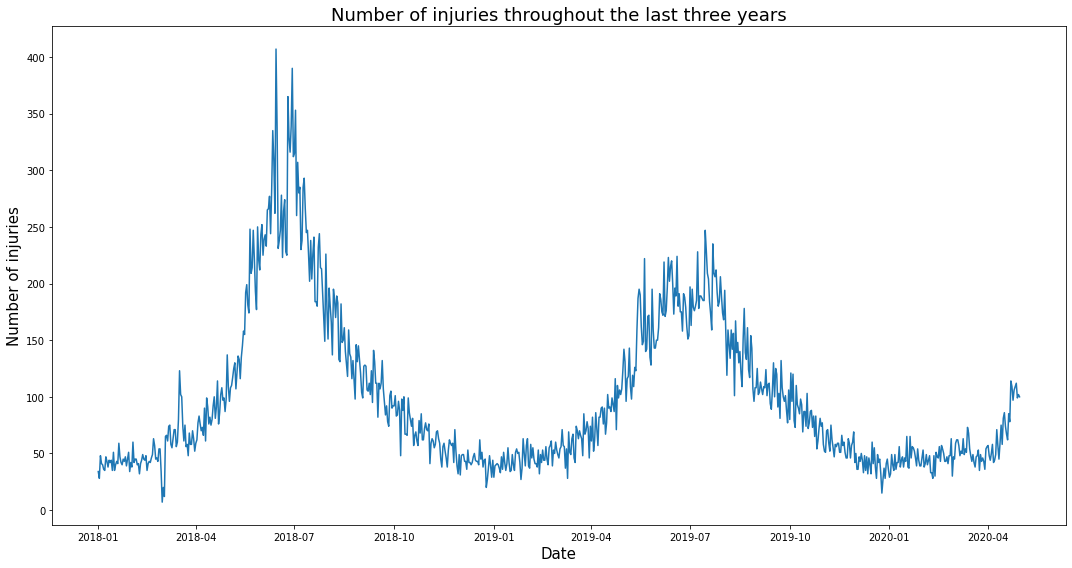

In [12]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = df_time)
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries throughout the last three years", size=18)
plt.tight_layout()

Looks like there is a trend of increase in injuries at summer time. Possibly because people walk more often and report injuries? Or just in general more injuries happen?

(736695.0, 736846.0)

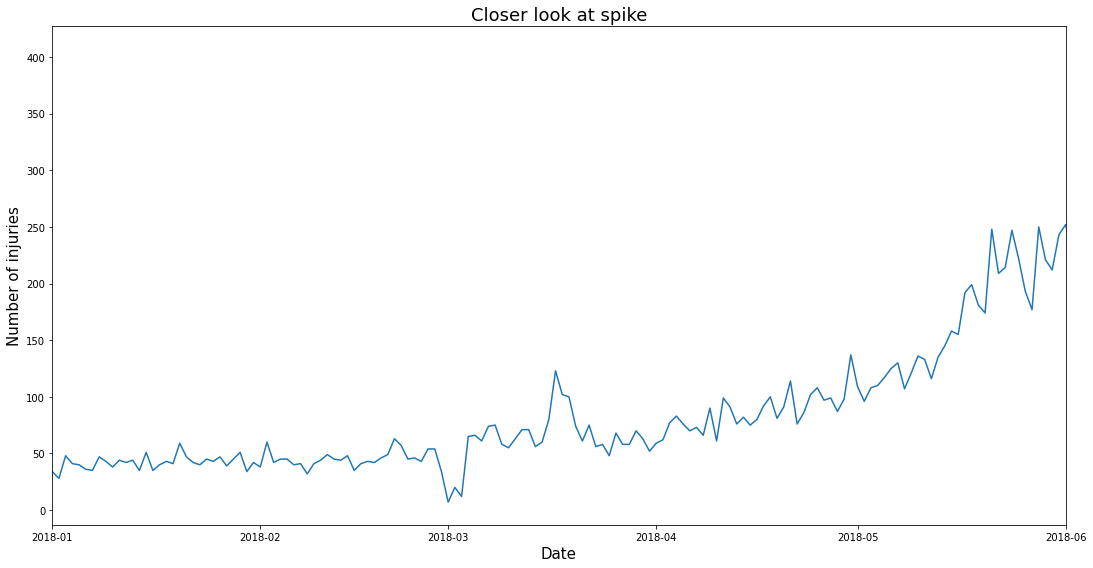

In [13]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = df_time)
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Closer look at spike", size=18)
plt.tight_layout()
plt.xlim([datetime.date(2018, 1,1), datetime.date(2018, 6,1)])

Quite a big spikes of report at around spring time in 2018.

## By year and region

In [14]:
injuries=wildlife.query("reason_for_call =='injury'")
weekly_injuries_by_region=injuries.groupby([pd.Grouper(key='CALL_SAVED_TIME',freq='W'),'CALL_REGION']).count()
weekly_injuries_by_region

CA_ANIMAL_TYPE  reason_for_call  type_of_calls
CALL_SAVED_TIME CALL_REGION                                                
2018-01-07      Aberdeen                 50               50             50
                Central                  66               66             66
                Edinburgh                43               43             43
                Glasgow                  60               60             60
                Inverness                18               18             18
...                                     ...              ...            ...
2020-05-03      Central                 101              101            101
                Edinburgh                73               73             73
                Glasgow                  89               89             89
                Inverness                35               35             35
                Unknown                  35               35             35

[732 rows x 3 columns]

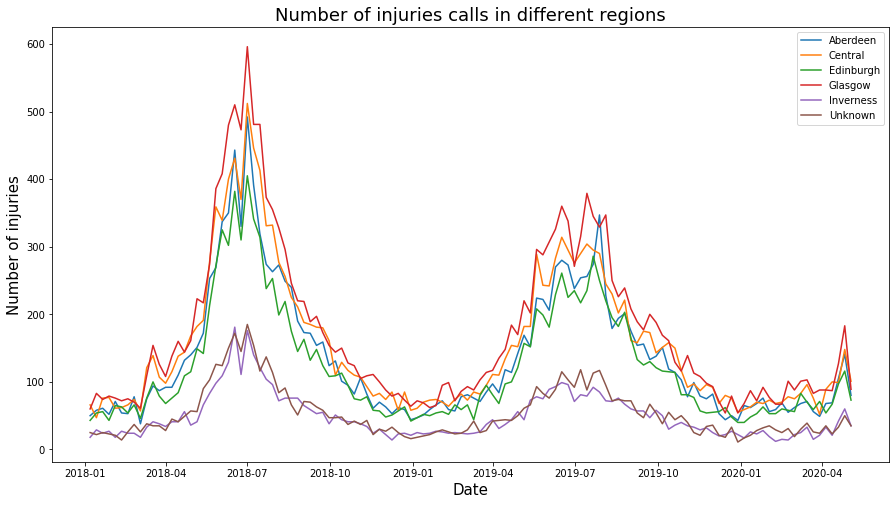

In [15]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='CALL_REGION',data=weekly_injuries_by_region)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries calls in different regions", size=18);

All regions have increase in summer time. 

Text(0.5, 1.0, 'Number of injuries calls in Aberdeen')

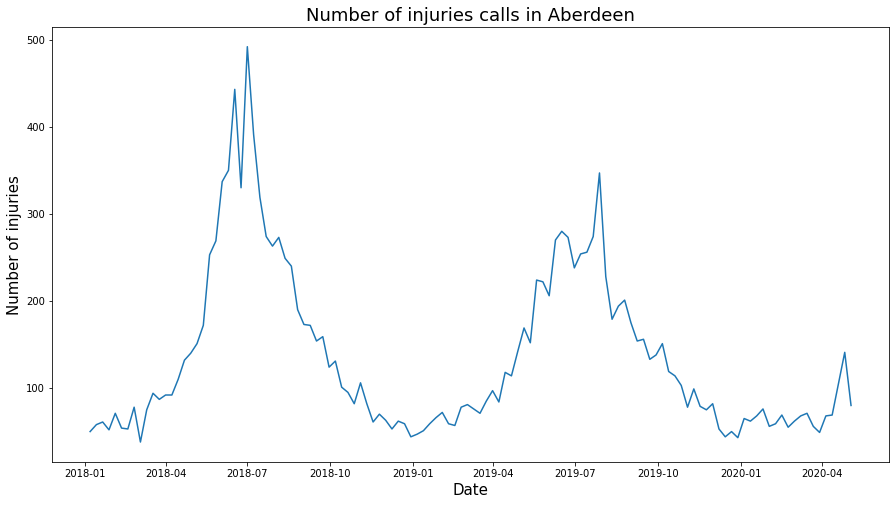

In [16]:
# any better for just one region?
aberdeen=weekly_injuries_by_region.query('CALL_REGION=="Aberdeen"')
plt.figure(figsize=(15,8))
sns.lineplot(data=aberdeen,x='CALL_SAVED_TIME',y='reason_for_call')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries calls in Aberdeen", size=18)

<Figure size 1080x576 with 0 Axes>

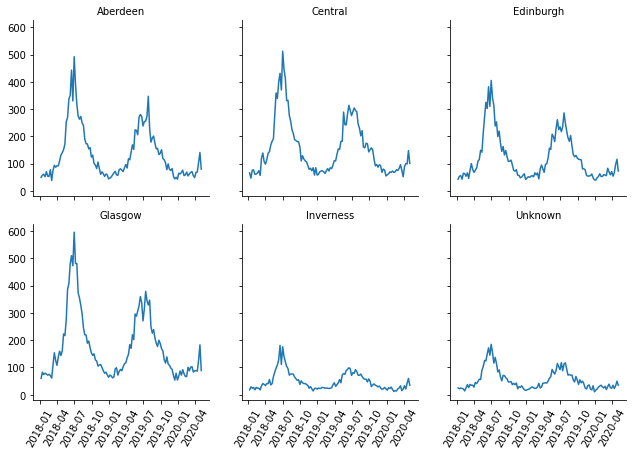

In [17]:
# should have been map_dataframe here, not map
plt.figure(figsize=(15,8))
separate=sns.FacetGrid(weekly_injuries_by_region.reset_index(), col='CALL_REGION', col_wrap=3)
separate.map_dataframe(sns.lineplot, x='CALL_SAVED_TIME', y='reason_for_call')
# this gets rid of CALL_REGION =
separate.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in separate.axes.flat];

It looks like all regions have decreasing trend in injuries reports.

# Trend by types of animals

In [18]:
df_type_region = wildlife_injuries.groupby(['CALL_REGION','CA_ANIMAL_TYPE']).count()
df_type_region

CALL_SAVED_TIME  reason_for_call  type_of_calls
CALL_REGION CA_ANIMAL_TYPE                                                  
Aberdeen    *Other Wildlife              350              350            350
            Badger                        35               35             35
            Bat                          159              159            159
            Deer                         585              585            585
            Duck                         271              271            271
...                                      ...              ...            ...
Unknown     Turtle                         2                2              2
            Weasel                         8                8              8
            Wild Bird                   3626             3627           3627
            Wild Mouse                    40               40             40
            Wild Rabbit                   88               88             88

[144 rows x 3 columns]

In [19]:
df_type_region.reset_index(inplace = True)

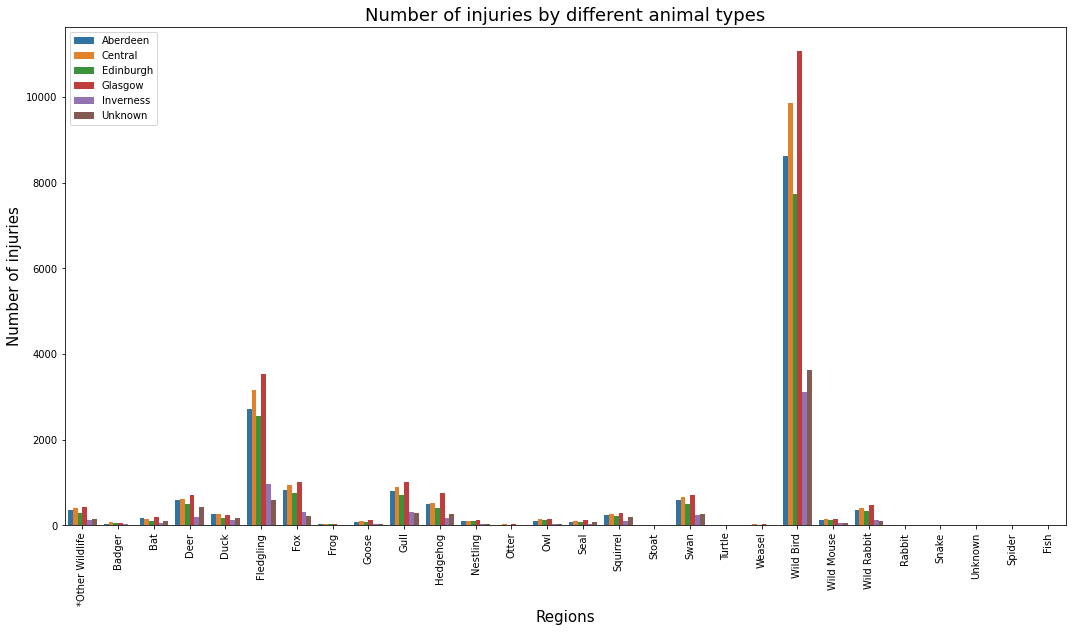

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(x="CA_ANIMAL_TYPE", hue = 'CALL_REGION', y="reason_for_call", data=df_type_region)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.legend(loc='best')

In [21]:
bird_region = df_type_region[df_type_region['CA_ANIMAL_TYPE']== 'Wild Bird']
bird_region = bird_region.sort_values('reason_for_call', ascending=False)
#created a new table as there are lots of wild birds in each region

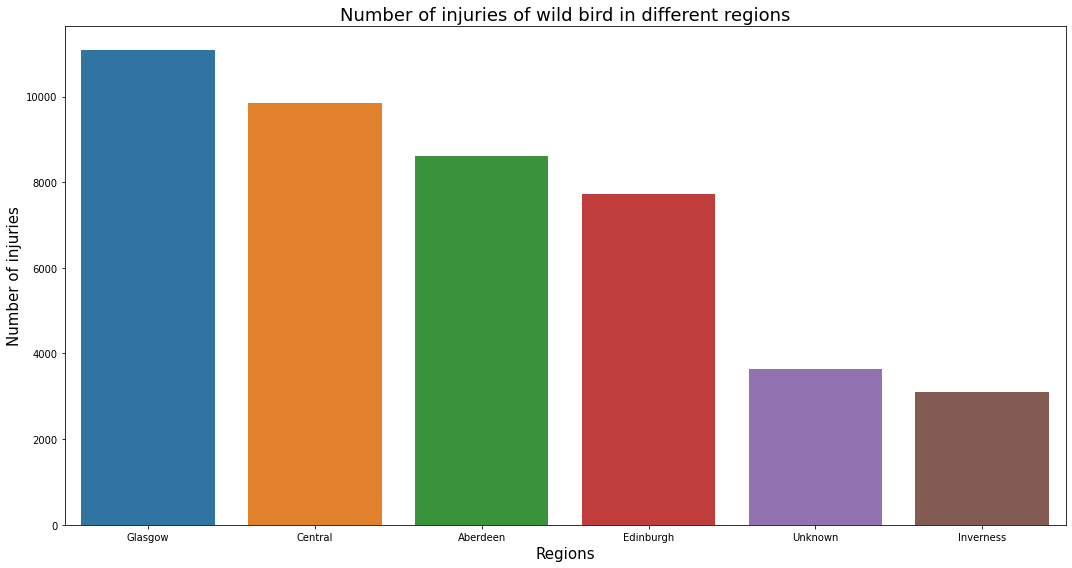

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(x="CALL_REGION", y="reason_for_call", data=bird_region)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries of wild bird in different regions", size=18)
plt.tight_layout()

In [23]:
all_types_region = df_type_region[df_type_region['CA_ANIMAL_TYPE']!= 'Wild Bird']
#table without wild bird

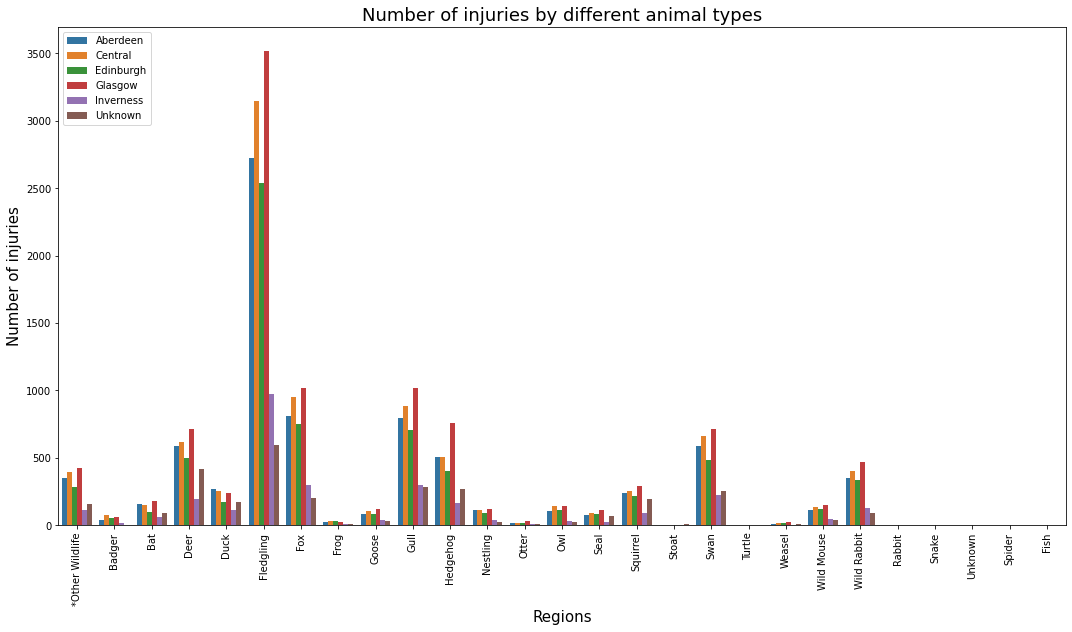

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(x="CA_ANIMAL_TYPE", hue = 'CALL_REGION', y="reason_for_call", data=all_types_region)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.legend(loc='best')

In [25]:
all_types_region.sort_values('reason_for_call',ascending = False).groupby('CALL_REGION').head(5).sort_values(['CALL_REGION','reason_for_call'])
#top 5 animals in each region by number of calls

,CALL_REGION,CA_ANIMAL_TYPE,CALL_SAVED_TIME,reason_for_call,type_of_calls
3,Aberdeen,Deer,585,585,585
17,Aberdeen,Swan,587,587,587
9,Aberdeen,Gull,792,793,793
6,Aberdeen,Fox,812,813,813
5,Aberdeen,Fledgling,2722,2723,2723
26,Central,Deer,620,620,620
42,Central,Swan,665,665,665
32,Central,Gull,883,885,885
29,Central,Fox,949,949,949
28,Central,Fledgling,3148,3150,3150


Top 5 animals in each region were assigned to a new column and the rest animals to 'other'. This was done to concentrate on the top 5 animals reported for injuries in each region.

In [26]:
conditions = [
    (all_types_region['CA_ANIMAL_TYPE']=='Fledgling'), (all_types_region['CA_ANIMAL_TYPE']=='Fox'),
    (all_types_region['CA_ANIMAL_TYPE']=='Gull'),(all_types_region['CA_ANIMAL_TYPE']=='Swan'),
    (all_types_region['CA_ANIMAL_TYPE']=='Hedgehog'), (all_types_region['CA_ANIMAL_TYPE']=='Deer'),
    (all_types_region['CA_ANIMAL_TYPE']=='Duck'),(all_types_region['CA_ANIMAL_TYPE']=='Badger'),
    (all_types_region['CA_ANIMAL_TYPE']=='Bat'),(all_types_region['CA_ANIMAL_TYPE']=='*Other Wildlife'),
    (all_types_region['CA_ANIMAL_TYPE']=='Frog'),(all_types_region['CA_ANIMAL_TYPE']=='Goose'),
    (all_types_region['CA_ANIMAL_TYPE']=='Nestling'),(all_types_region['CA_ANIMAL_TYPE']=='Otter'),
    (all_types_region['CA_ANIMAL_TYPE']=='Owl'),(all_types_region['CA_ANIMAL_TYPE']=='Seal'),
    (all_types_region['CA_ANIMAL_TYPE']=='Squirrel'),(all_types_region['CA_ANIMAL_TYPE']=='Weasel'),
    (all_types_region['CA_ANIMAL_TYPE']=='Turtle'),(all_types_region['CA_ANIMAL_TYPE']=='Seal'),
    (all_types_region['CA_ANIMAL_TYPE']=='Wild Mouse'),(all_types_region['CA_ANIMAL_TYPE']=='Wild Rabbit'),
    (all_types_region['CA_ANIMAL_TYPE']=='Fish'),(all_types_region['CA_ANIMAL_TYPE']=='Rabbit'),
    (all_types_region['CA_ANIMAL_TYPE']=='Snake'),(all_types_region['CA_ANIMAL_TYPE']=='Stoat')
]
choices = ['Fledgling', 'Fox','Gull','Swan','Hedgehog','Deer','Duck','Other','Other','Other','Other','Other','Other',
          'Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other']

In [27]:
all_types_region['animal_type']=np.select(conditions,choices).copy()

<ipython-input-27-7b6921d577c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_types_region['animal_type']=np.select(conditions,choices).copy()


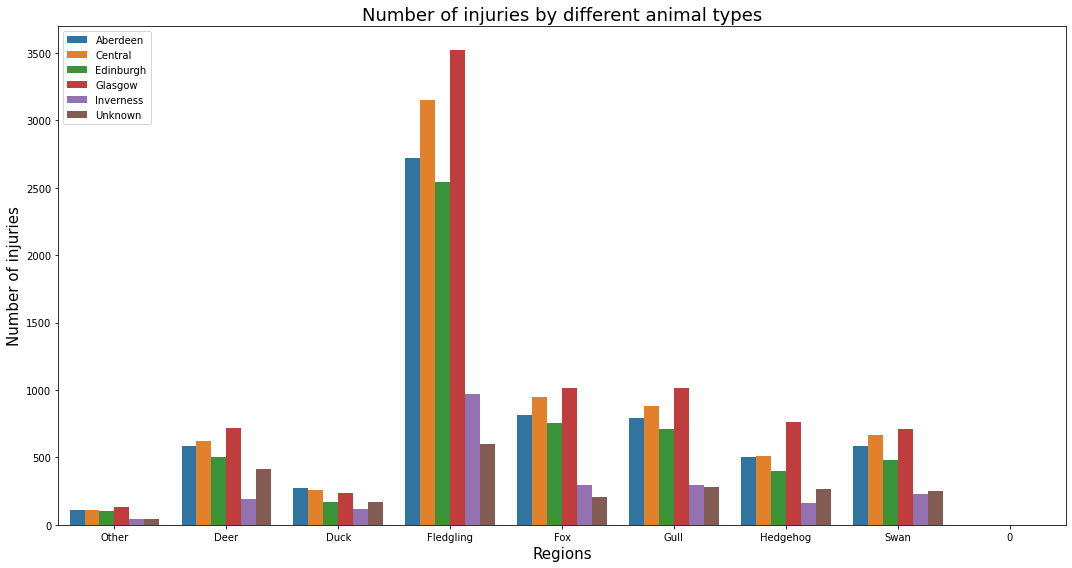

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(x="animal_type", hue = 'CALL_REGION', y="reason_for_call", data=all_types_region,ci = False)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18)
plt.tight_layout()
plt.legend(loc='best')

Fledgling has the highest after wild bird.

<Figure size 1080x576 with 0 Axes>

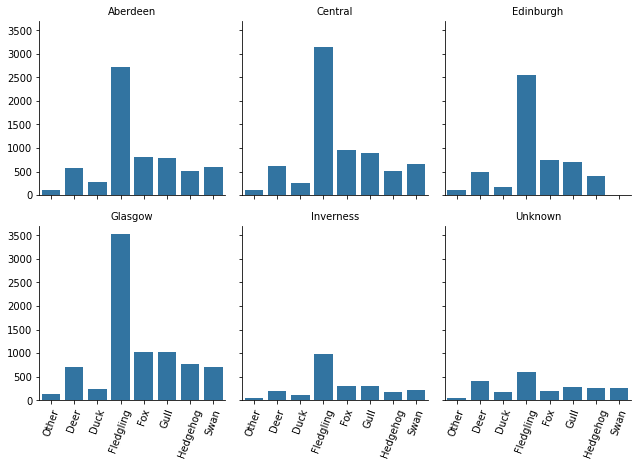

In [29]:
plt.figure(figsize=(15,8))
s_type=sns.FacetGrid(all_types_region, col='CALL_REGION', col_wrap=3)
s_type.map_dataframe(sns.barplot, x='animal_type', y='reason_for_call',ci = False)
s_type.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=70) for ax in s_type.axes.flat];

<Figure size 1080x576 with 0 Axes>

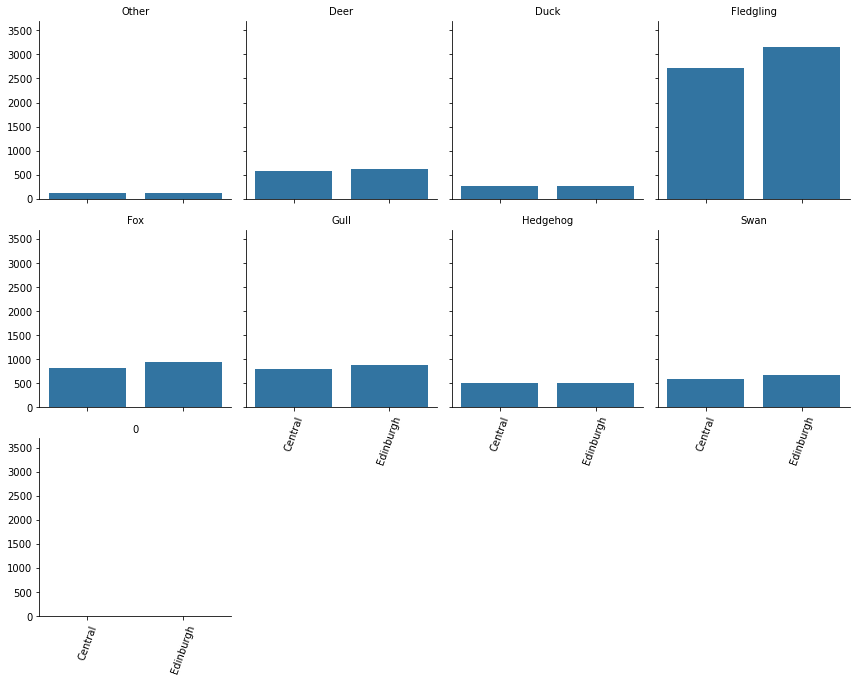

In [30]:
plt.figure(figsize=(15,8))
s_type=sns.FacetGrid(all_types_region, col='animal_type', col_wrap=4)
s_type.map_dataframe(sns.barplot, x='CALL_REGION', y='reason_for_call',ci = False)
s_type.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=70) for ax in s_type.axes.flat];

# Trend by types and year

In [31]:
weekly_injuries_by_types=injuries.groupby([pd.Grouper(key='CALL_SAVED_TIME',freq='W'),'CA_ANIMAL_TYPE']).count()
weekly_injuries_by_types

CALL_REGION  reason_for_call  type_of_calls
CALL_SAVED_TIME CA_ANIMAL_TYPE                                              
2018-01-07      *Other Wildlife           11               11             11
                Bat                        1                1              1
                Deer                       9                9              9
                Duck                       6                6              6
                Fledgling                 41               41             41
...                                      ...              ...            ...
2020-05-03      Seal                       5                5              5
                Swan                      15               15             15
                Wild Bird                230              230            230
                Wild Mouse                 7                7              7
                Wild Rabbit                8                8              8

[2346 rows x 3 columns]

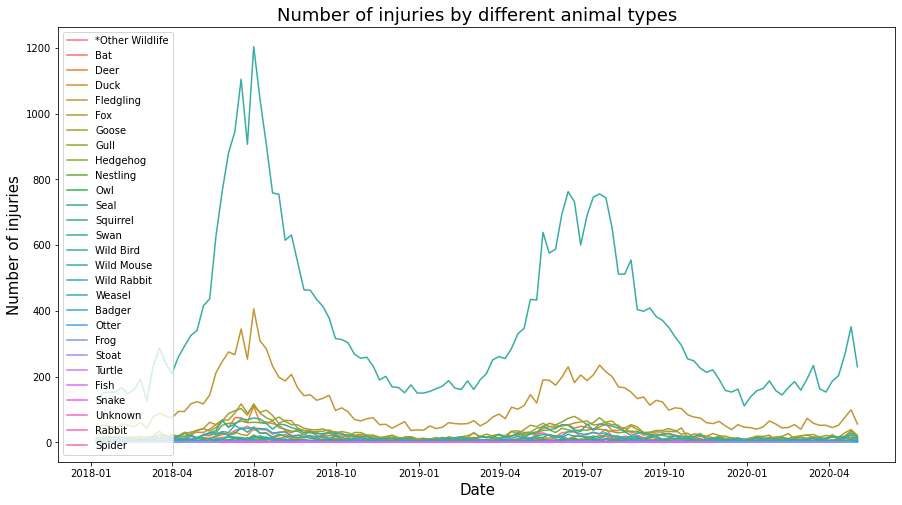

In [32]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='CA_ANIMAL_TYPE',data=weekly_injuries_by_types)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18);
# Wild Bird is the highest

In [33]:
weekly_injuries_by_types= weekly_injuries_by_types.reset_index().copy()
weekly_injuries_by_types

,CALL_SAVED_TIME,CA_ANIMAL_TYPE,CALL_REGION,reason_for_call,type_of_calls
0,2018-01-07,*Other Wildlife,11,11,11
1,2018-01-07,Bat,1,1,1
2,2018-01-07,Deer,9,9,9
3,2018-01-07,Duck,6,6,6
4,2018-01-07,Fledgling,41,41,41
...,...,...,...,...,...
2341,2020-05-03,Seal,5,5,5
2342,2020-05-03,Swan,15,15,15
2343,2020-05-03,Wild Bird,230,230,230
2344,2020-05-03,Wild Mouse,7,7,7


In [34]:
top5type_weekly = weekly_injuries_by_types.sort_values('reason_for_call', ascending = False).groupby('CALL_SAVED_TIME').head(5).sort_values(['CALL_SAVED_TIME','reason_for_call']).copy()

In [35]:
top5type_weekly = top5type_weekly.reset_index().copy()
top5type_weekly
#top 5 animals injured every week

,index,CALL_SAVED_TIME,CA_ANIMAL_TYPE,CALL_REGION,reason_for_call,type_of_calls
0,0,2018-01-07,*Other Wildlife,11,11,11
1,5,2018-01-07,Fox,13,13,13
2,13,2018-01-07,Swan,15,15,15
3,4,2018-01-07,Fledgling,41,41,41
4,14,2018-01-07,Wild Bird,127,127,127
...,...,...,...,...,...,...
605,2332,2020-05-03,Deer,16,16,16
606,2337,2020-05-03,Gull,18,18,18
607,2335,2020-05-03,Fox,21,21,21
608,2334,2020-05-03,Fledgling,56,56,56


In [36]:
top5type_weekly['CA_ANIMAL_TYPE'].unique()

array(['*Other Wildlife', 'Fox', 'Swan', 'Fledgling', 'Wild Bird', 'Gull',
       'Deer', 'Hedgehog', 'Squirrel', 'Wild Rabbit'], dtype=object)

Based on this top 5 animals in each region, I am going to create a new column with assigned types and other types.

In [37]:
conditions = [
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Fledgling'), (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Fox'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Gull'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Swan'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Hedgehog'), (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Deer'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Duck'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Badger'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Bat'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='*Other Wildlife'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Frog'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Goose'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Nestling'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Otter'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Owl'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Seal'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Squirrel'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Weasel'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Turtle'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Seal'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Wild Mouse'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Wild Rabbit'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Fish'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Rabbit'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Snake'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Stoat'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Wild Bird')
]
choices = ['Fledgling', 'Fox','Gull','Swan','Hedgehog','Deer','Duck','The rest animals','Bat','Other Wildlife','The rest animals','Goose','Nestling',
          'The rest animals','Owl','Seal','Squirrel','The rest animals','The rest animals','The rest animals','The rest animals','Wild Rabbit','The rest animals','The rest animals','The rest animals','The rest animals',
          'Wild Bird']

In [38]:
weekly_injuries_by_types['animal_type']=np.select(conditions,choices).copy()

In [39]:
weekly_injuries_by_types

,CALL_SAVED_TIME,CA_ANIMAL_TYPE,CALL_REGION,reason_for_call,type_of_calls,animal_type
0,2018-01-07,*Other Wildlife,11,11,11,Other Wildlife
1,2018-01-07,Bat,1,1,1,Bat
2,2018-01-07,Deer,9,9,9,Deer
3,2018-01-07,Duck,6,6,6,Duck
4,2018-01-07,Fledgling,41,41,41,Fledgling
...,...,...,...,...,...,...
2341,2020-05-03,Seal,5,5,5,Seal
2342,2020-05-03,Swan,15,15,15,Swan
2343,2020-05-03,Wild Bird,230,230,230,Wild Bird
2344,2020-05-03,Wild Mouse,7,7,7,The rest animals


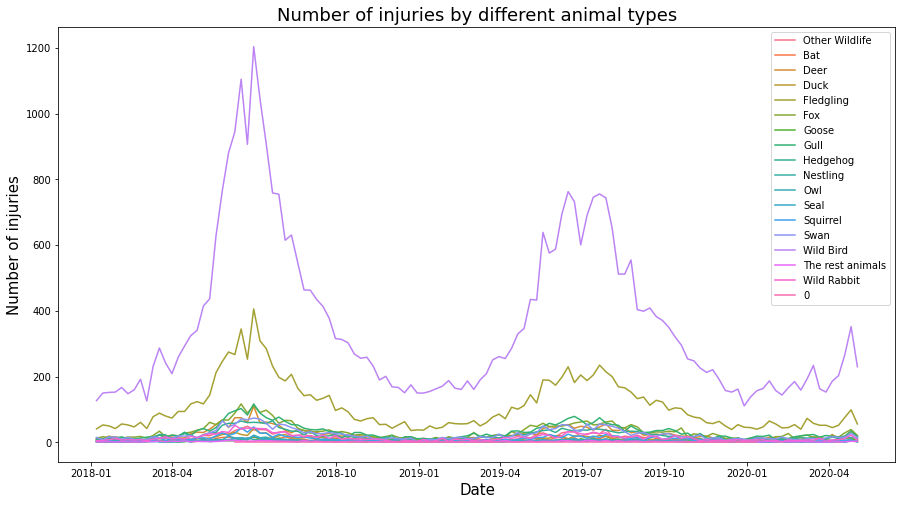

In [40]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='animal_type',data=weekly_injuries_by_types)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18);
#better but still cannot see small numbers - requires separation

In [41]:
weekly_high = weekly_injuries_by_types[weekly_injuries_by_types['animal_type'].isin(['Wild Bird','Gull','Fledgling'])]

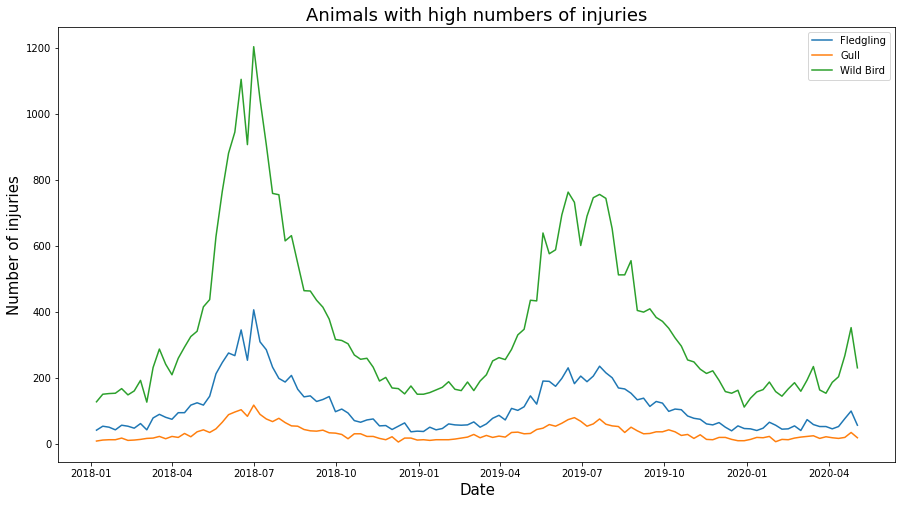

In [42]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='animal_type',data=weekly_high)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Animals with high numbers of injuries", size=18);

Birds injuries relate to seasons.

In [43]:
weekly_low = weekly_injuries_by_types[~weekly_injuries_by_types['animal_type'].isin(['Wild Bird','Gull','Fledgling'])]

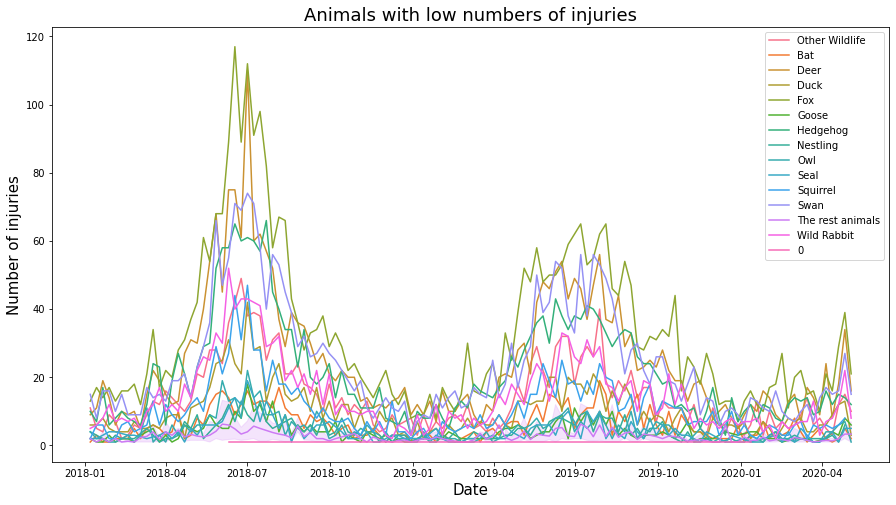

In [44]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='animal_type',data=weekly_low)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Animals with low numbers of injuries", size=18);

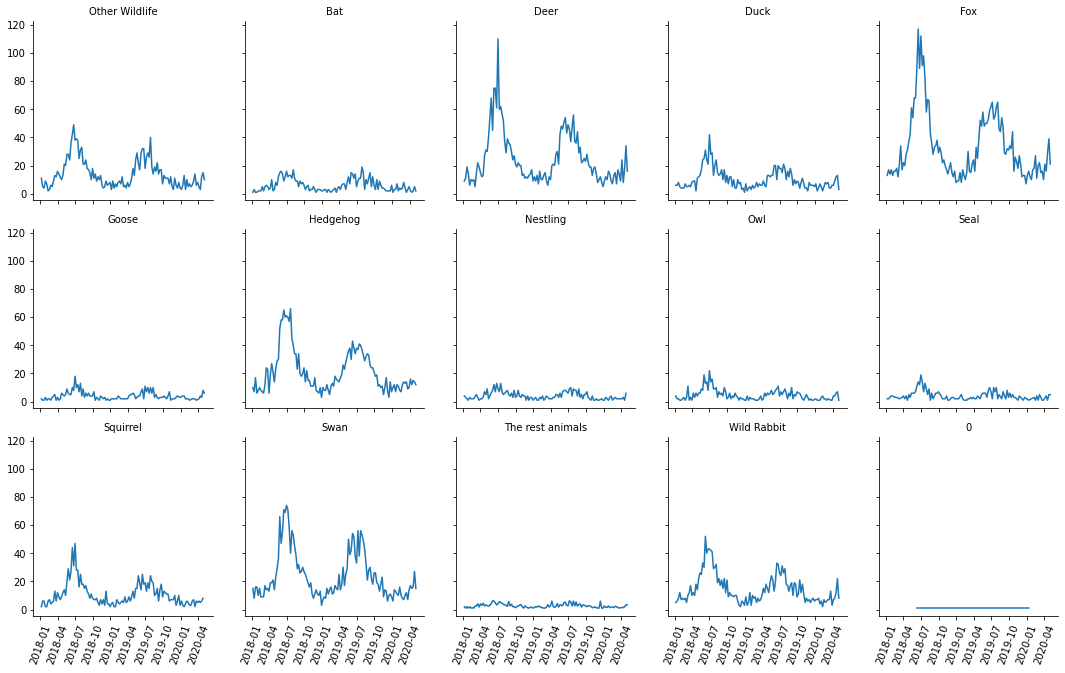

In [45]:
w_type=sns.FacetGrid(weekly_low, col='animal_type', col_wrap=5)
w_type.map_dataframe(sns.lineplot, x='CALL_SAVED_TIME', y='reason_for_call',ci = False)
w_type.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=70) for ax in w_type.axes.flat];

Some animals such as owl or goose and deer have no relation to season.

# Analysis of advice calls

In [46]:
calls_df = wildlife.groupby(['type_of_calls','CALL_SAVED_TIME']).count().reset_index()
calls_df

,type_of_calls,CALL_SAVED_TIME,CALL_REGION,CA_ANIMAL_TYPE,reason_for_call
0,advice_calls,2018-01-01,1,1,1
1,advice_calls,2018-01-02,3,3,3
2,advice_calls,2018-01-04,1,1,1
3,advice_calls,2018-01-05,1,1,1
4,advice_calls,2018-01-07,2,2,2
...,...,...,...,...,...
1630,report_calls,2020-04-26,173,173,173
1631,report_calls,2020-04-27,189,189,189
1632,report_calls,2020-04-28,185,185,185
1633,report_calls,2020-04-29,184,184,184


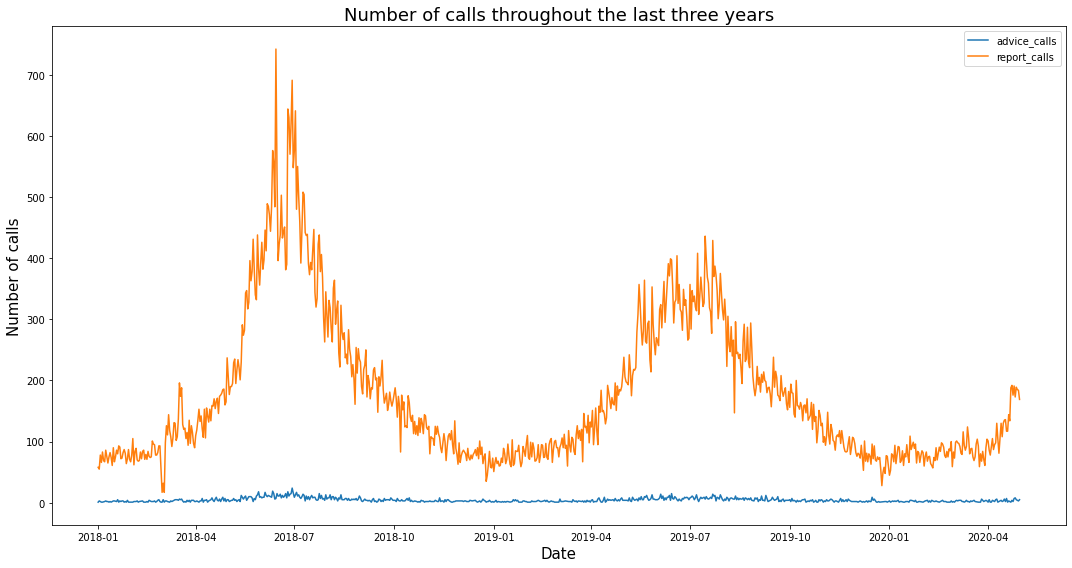

In [47]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call",hue = 'type_of_calls', data = calls_df)
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of calls throughout the last three years", size=18)
plt.legend(loc='best')
plt.tight_layout()
#as expected there are more report calls than advice

In [48]:
advice_df = calls_df[calls_df['type_of_calls']=='advice_calls']

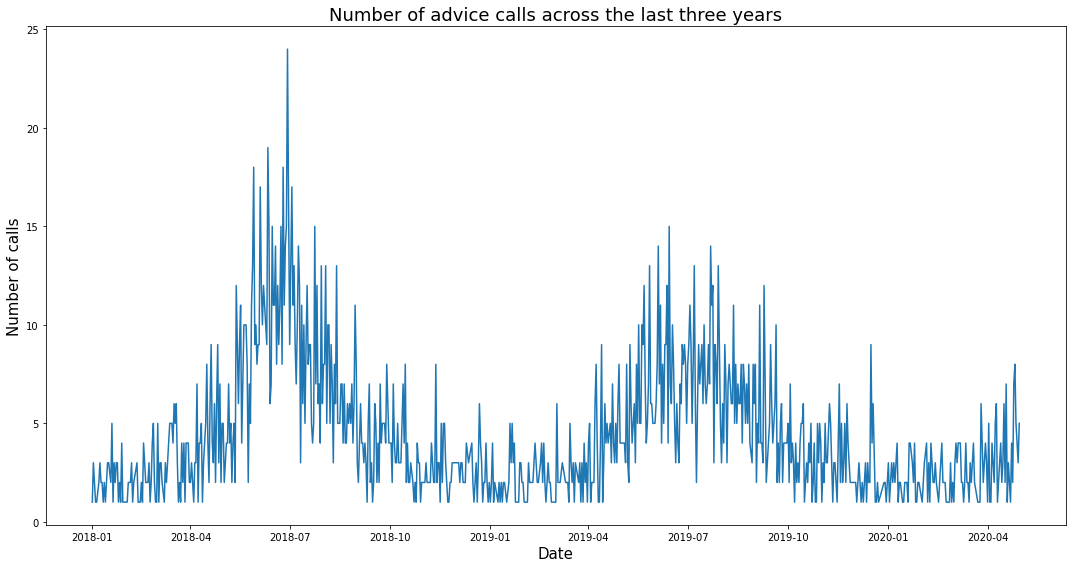

In [49]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = advice_df)
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of advice calls across the last three years", size=18)
plt.tight_layout()
#so many lines, requires to be changed to weekly calls

In [50]:
weekly_calls = wildlife.groupby([pd.Grouper(key = 'CALL_SAVED_TIME',freq = 'W'),'type_of_calls']).count()
weekly_calls

CALL_REGION  CA_ANIMAL_TYPE  reason_for_call
CALL_SAVED_TIME type_of_calls                                              
2018-01-07      advice_calls             8               8                8
                report_calls           476             476              476
2018-01-14      advice_calls            11              11               11
                report_calls           519             519              519
2018-01-21      advice_calls            17              17               17
...                                    ...             ...              ...
2020-04-19      report_calls           873             873              873
2020-04-26      advice_calls            27              27               27
                report_calls          1198            1198             1198
2020-05-03      advice_calls            17              17               17
                report_calls           727             727              727

[244 rows x 3 columns]

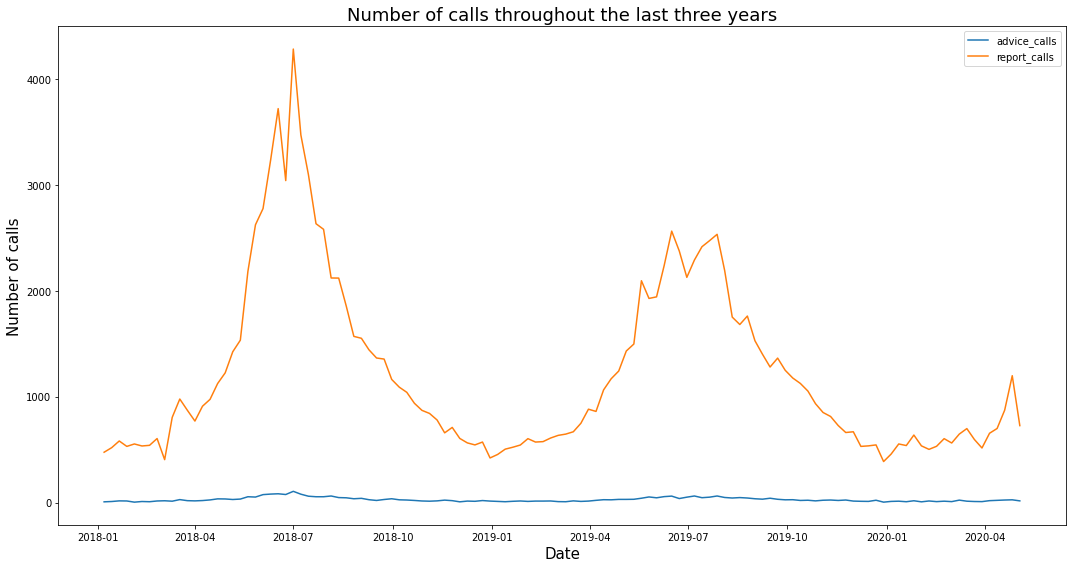

In [51]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", hue = 'type_of_calls', data = weekly_calls)
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of calls throughout the last three years", size=18)
plt.legend(loc='best')
plt.tight_layout()
#the same as daily plot but more smoother

In [52]:
advice_weekly_df = weekly_calls.reset_index()
advice_weekly_df = advice_weekly_df[advice_weekly_df['type_of_calls']=='advice_calls']

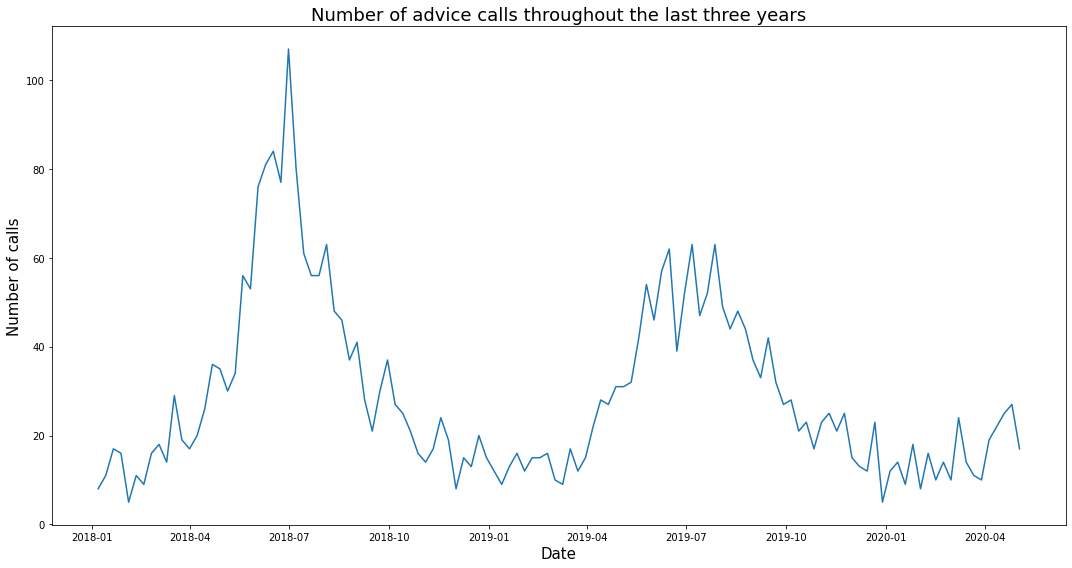

In [53]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = advice_weekly_df)
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of advice calls throughout the last three years", size=18)
plt.tight_layout()

#similar trend - increase at around spring/summer time